In [15]:
from keras.datasets import mnist
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
print('Trainig data size', X_train.shape)
print('Test data size', X_test.shape)

Trainig data size (60000, 28, 28)
Test data size (10000, 28, 28)


1


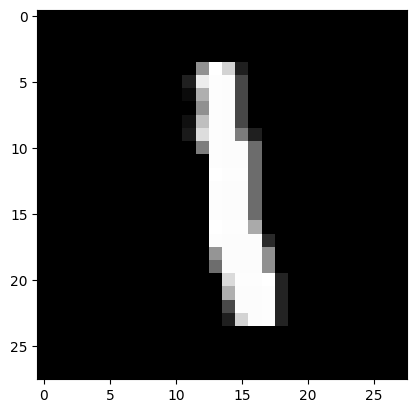

In [4]:
n = 6
plt.imshow(X_train[n], cmap='gray')
print(y_train[n])

In [5]:
X_train = X_train.reshape(-1, 28*28)
X_train = X_train.astype('float32') / 225
X_test = X_test.reshape(-1, 28*28)
X_test = X_test.astype('float32') / 225
y_train = y_train.astype('int64')
y_test = y_test.astype('int64')

In [6]:
batch_size = 100  # размер батча для обучения
num_input = 784  # количество входных нейронов (28 * 28)
num_hidden1 = 128  # количество нейронов первого скрытого слоя
num_hidden2 = 256  # количество нейронов второго скрытого слоя
num_hidden3 = 128  # количество нейронов третьего скрытого слоя
num_output = 10  # количество выходов (такое же, как количество классов)

In [7]:
def multi_layer_perceptron_mnist(x):
    # создаем первый скрытый слой со своими весами и сдвигами, используем ReLU в качестве функции активации
    hidden_layer1 = tf.add(tf.matmul(x, weights['w_h1']), biases['b_h1'])
    hidden_layer1 = tf.nn.relu(hidden_layer1)
    # создаем второй скрытый слой со своими весами и сдвигами, используем ReLU в качестве функции активации
    hidden_layer2 = tf.add(tf.matmul(hidden_layer1, weights['w_h2']), biases['b_h2'])
    hidden_layer2 = tf.nn.relu(hidden_layer2)
    # создаем третий скрытый слой со своими весами и сдвигами, используем ReLU в качестве функции активации, при обучении используем dropout
    hidden_drop = tf.nn.dropout(hidden_layer2, 0.1)
    hidden_layer3 = tf.add(tf.matmul(hidden_drop, weights['w_h3']), biases['b_h3'])
    hidden_layer3 = tf.nn.relu(hidden_layer3)
    # создаем последний слой, в качестве функции активации будет использоваться Softmax-подход, его введем в loss-части
    out_layer = tf.add(tf.matmul(hidden_layer3, weights['w_out']), biases['b_out'])
    return out_layer

In [8]:
weights = {
    'w_h1': tf.Variable(tf.random.normal([num_input, num_hidden1])),
    'w_h2': tf.Variable(tf.random.normal([num_hidden1, num_hidden2])),
    'w_h3': tf.Variable(tf.random.normal([num_hidden2, num_hidden3])),
    'w_out': tf.Variable(tf.random.normal([num_hidden3, num_output]))
}
biases = {
    'b_h1': tf.Variable(tf.random.normal([num_hidden1])),
    'b_h2': tf.Variable(tf.random.normal([num_hidden2])),
    'b_h3': tf.Variable(tf.random.normal([num_hidden3])),
    'b_out': tf.Variable(tf.random.normal([num_output]))
}

In [9]:
def forward_pass(x):
  return multi_layer_perceptron_mnist(x)

In [10]:
def loss():
  return tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits=forward_pass(X_batch), labels=y_batch))

In [11]:
optimizer = tf.optimizers.Adam(0.01)

In [12]:
ep_number = 3
batch_size = 1000
display_step = 10

In [13]:
history = []

for ep in range(ep_number):
  for _ in range(0, int(len(X_train) / batch_size - 1)):
    X_batch = X_train[_ * batch_size: (_ + 1) * batch_size]
    y_batch = y_train[_ * batch_size: (_ + 1) * batch_size]
    optimizer.minimize(loss, var_list=([values for key, values in weights.items()] + [values for key, values in biases.items()]))
    history.append([ep, loss().numpy()])
  X_batch = X_train[(_ + 1) * batch_size :]
  y_batch = y_train[(_ + 1) * batch_size :]
  optimizer.minimize(loss, var_list=([values for key, values in weights.items()] + [values for key, values in biases.items()]))
  print('Epoch: ' + str(ep+1) + ' Loss: ' + str(loss()))

Epoch: 1 Loss: tf.Tensor(210.62279, shape=(), dtype=float32)
Epoch: 2 Loss: tf.Tensor(111.226875, shape=(), dtype=float32)
Epoch: 3 Loss: tf.Tensor(69.19139, shape=(), dtype=float32)


In [16]:
pd.DataFrame(history)[1].min()

65.85578

In [17]:
results = tf.nn.softmax(forward_pass(X_test))

In [18]:
results[0]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.99999994, 0.        , 0.        ],
      dtype=float32)>

tf.Tensor(
[0.         0.         0.99999994 0.         0.         0.
 0.         0.         0.         0.        ], shape=(10,), dtype=float32)


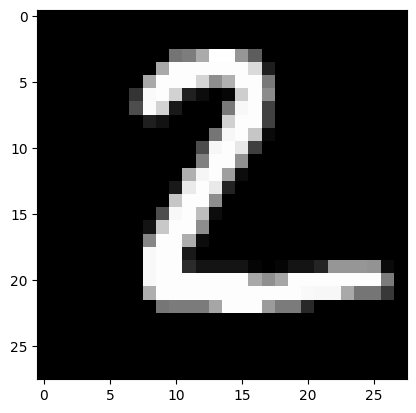

In [19]:
plt.imshow(X_test[1].reshape(28, 28), cmap='gray')
print(results[1])

In [20]:
correct_predictions = tf.equal(tf.argmax(results, 1), y_test)

In [21]:
accuracy = tf.reduce_mean(tf.cast(correct_predictions, tf.float32))
accuracy

<tf.Tensor: shape=(), dtype=float32, numpy=0.8715>